In [1]:
# ------------    Load Dataset & Libraries    ------------
# Import the following packages needed to perform the analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To remove 'warnings' use 'filterwarnings'
import warnings
warnings.filterwarnings('ignore')

# plot shown in Jupyter Notebook
%matplotlib inline  
# expand the figure-width
plt.rcParams['figure.figsize'] = 8, 4


# Loading Dataset
# Import the csv dataset
movies = pd.read_csv("./MovieRatings.csv")     # load datset

# -=-=-  Explore the data  -=-=-
# Visualize the dataframe
movies

# rename the column names to single-string names
movies.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRating', 'BudgetMillions', 'Year']
movies.head()    # view dataset


# ----   convert 'numerical-type',' object-type' to "categorical-type"   ----
movies.Film = movies.Film.astype("category") # use assignment '=' to update the dataset
movies.Genre = movies.Genre.astype("category")   
movies.Year = movies.Year.astype("category")   
movies.info()   # check the data-type changes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Film            559 non-null    category
 1   Genre           559 non-null    category
 2   CriticRating    559 non-null    int64   
 3   AudienceRating  559 non-null    int64   
 4   BudgetMillions  559 non-null    int64   
 5   Year            559 non-null    category
dtypes: category(3), int64(3)
memory usage: 36.5 KB


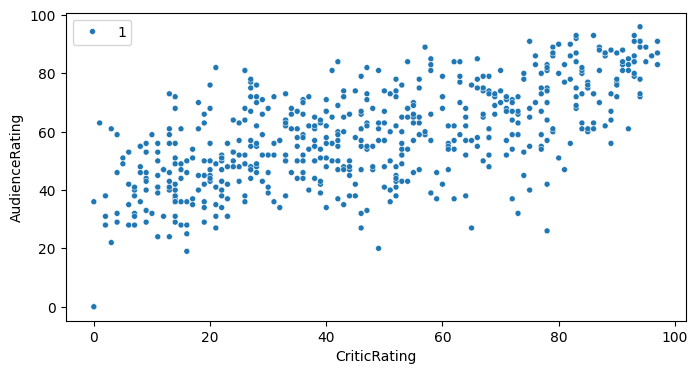

In [6]:
# ------------    KDE PLOT: Kernel Density Estimate plot    ------------

# How can we visualize 'audiance rating' vs 'critic rating'?
    # We can use 'scatter-plot'
    # We also can use 'lmplot'
vis1_sctr = sns.scatterplot(data=movies, x='CriticRating', y='AudienceRating', size=1)

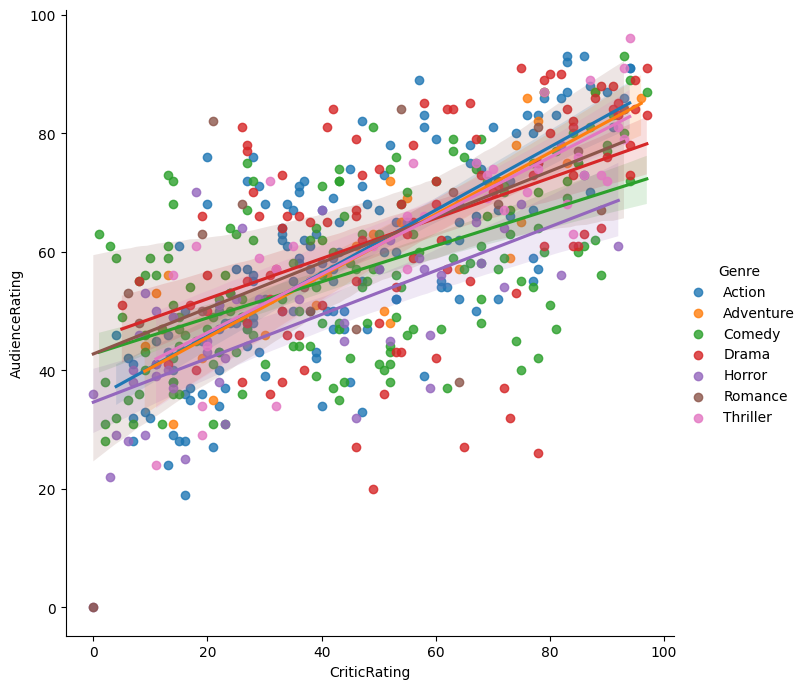

In [8]:
# lmplot
vis2_lm = sns.lmplot(data=movies, x='CriticRating', y='AudienceRating', fit_reg=True, hue='Genre', height=7, aspect=1)    

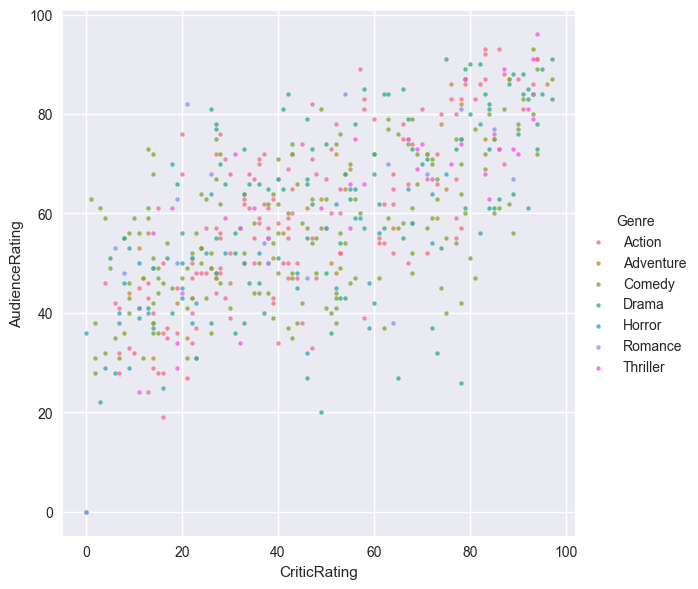

In [15]:
plt.style.use("seaborn")    # background color
vis2_lm = sns.lmplot(data=movies, x='CriticRating', y='AudienceRating', fit_reg=False, hue='Genre', height=6, aspect=1, scatter_kws={'s': 10})